In [1]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
herectvo = pd.read_json(os.path.join("data", "herectvo.json"))

In [3]:
df = pd.read_json(os.path.join("data", "filmy.json"))
df["Hlavní role"] = df["Hrají"].dropna().apply(lambda x: x[:3])
df["Vedlejší role"] = df["Hrají"].dropna().apply(lambda x: x[3:])
df = df.explode("Hrají")

## Obecná data

In [4]:
len(herectvo["Jméno"].drop_duplicates().to_list())

12115

In [5]:
zijici = herectvo[(~herectvo["Datum narození"].isnull()) & herectvo["Datum úmrtí"].isnull()]["Jméno"].drop_duplicates().to_list()

In [6]:
len(zijici)

2979

In [7]:
veskere_herectvo = df["Hrají"].drop_duplicates().to_list()

In [8]:
len(veskere_herectvo)

16140

In [9]:
obsazovanost = pd.Series(herectvo.groupby("Jméno")["Film"].nunique(), name="Obsazovanost")

In [10]:
obsazovanost.quantile([0.25,0.333,0.5,0.667,0.75,0.9,0.95,0.99])

0.250     1.0
0.333     1.0
0.500     1.0
0.667     3.0
0.750     4.0
0.900    14.0
0.950    30.0
0.990    73.0
Name: Obsazovanost, dtype: float64

In [11]:
obsazovanost2 = pd.Series(df.groupby("Hrají")["Film"].nunique(), name="Obsazovanost 2")

In [12]:
obsazovanost2.quantile([0.25,0.333,0.5,0.667,0.75,0.9,0.95,0.99])

0.250     1.0
0.333     1.0
0.500     1.0
0.667     2.0
0.750     3.0
0.900    10.0
0.950    22.0
0.990    62.0
Name: Obsazovanost 2, dtype: float64

In [13]:
q = obsazovanost2.quantile(0.95)
q

22.0

In [14]:
q2 = obsazovanost2.quantile(0.99)
q2

62.0

## Nejdelší a nejplodnější kariéry

In [15]:
delka_kariery = pd.Series(herectvo.groupby("Jméno")["Rok"].max() - herectvo.groupby("Jméno")["Rok"].min(), name="Délka kariéry")
delka_kariery.sort_values(ascending=False).head(10)

Jméno
Jiřina Bohdalová (2878)       79
František Kovářík (126912)    77
Zdenka Procházková (42989)    75
Zita Kabátová (839)           73
Jára Kohout (4846)            73
Miroslav Mráz (125568)        71
Jiří Novotný (9283)           69
Svatopluk Beneš (13617)       69
Jaroslava Adamová (11226)     68
Ladislav Chudík (14421)       68
Name: Délka kariéry, dtype: int64

In [16]:
delka_kariery = pd.Series(herectvo[(~herectvo["Datum narození"].isnull()) & herectvo["Datum úmrtí"].isnull()].groupby("Jméno")["Rok"].max() - herectvo[(~herectvo["Datum narození"].isnull()) & herectvo["Datum úmrtí"].isnull()].groupby("Jméno")["Rok"].min(), name="Délka kariéry")
delka_kariery.sort_values(ascending=False).head(10)

Jméno
Jiřina Bohdalová (2878)     79
Jiří Novotný (9283)         69
Jiří Suchý (2270)           65
Antonín Hardt (19168)       64
Soňa Červená (10930)        63
Miriam Kantorková (3863)    62
Jan Kačer (1165)            62
František Němec (2788)      61
Hanuš Bor (7070)            61
Rudolf Jelínek (6133)       61
Name: Délka kariéry, dtype: int64

In [17]:
delka_kariery = pd.Series(herectvo.groupby("Jméno")["Rok"].max() - herectvo.groupby("Jméno")["Rok"].min(), name="Délka kariéry")
delka_kariery.sort_values(ascending=False).head(10)

Jméno
Jiřina Bohdalová (2878)       79
František Kovářík (126912)    77
Zdenka Procházková (42989)    75
Zita Kabátová (839)           73
Jára Kohout (4846)            73
Miroslav Mráz (125568)        71
Jiří Novotný (9283)           69
Svatopluk Beneš (13617)       69
Jaroslava Adamová (11226)     68
Ladislav Chudík (14421)       68
Name: Délka kariéry, dtype: int64

In [18]:
herectvo.groupby("Jméno")["Film"].nunique().nlargest(10)

Jméno
Jan W. Speerger (55928)        275
Theodor Pištěk (37366)         247
Eman Fiala (64088)             210
Jaroslav Marvan (9550)         209
Mirko Musil (33555)            192
František Filipovský (4735)    186
Oldřich Velen (12725)          177
Alois Dvorský (127491)         169
Milka Balek-Brodská (28799)    164
Josef Kemr (4897)              162
Name: Film, dtype: int64

In [19]:
herectvo.groupby(["Jméno","Rok"])["Film"].nunique().nlargest()

Jméno                    Rok 
Jan W. Speerger (55928)  1937    21
Theodor Pištěk (37366)   1937    20
                         1938    20
Jan W. Speerger (55928)  1938    19
Jaroslav Marvan (9550)   1938    18
Name: Film, dtype: int64

In [20]:
herectvo[herectvo["Rok"] > 1989].groupby(["Jméno","Rok"])["Film"].nunique().nlargest()

Jméno                   Rok 
Ondřej Malý (59148)     2016    8
Jiří Krampol (4985)     2002    7
Martin Pechlát (9426)   2016    7
Martin Stránský (7770)  2019    7
Pavel Nový (510)        1995    7
Name: Film, dtype: int64

In [21]:
df.explode("Hrají").groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Jan W. Speerger (55928)        281
Theodor Pištěk (37366)         254
Eman Fiala (64088)             214
Jaroslav Marvan (9550)         208
František Filipovský (4735)    181
Alois Dvorský (127491)         169
Milka Balek-Brodská (28799)    166
Oldřich Velen (12725)          166
Josef Kemr (4897)              161
Jaroslav Tomsa (2576)          152
Name: Film, dtype: int64

In [22]:
vsechno_herectvo = df["Hrají"].drop_duplicates().to_list()

In [23]:
nejaktivnejsich500 = herectvo.groupby("Jméno")["Film"].nunique().nlargest(500).index.to_list()

<AxesSubplot:xlabel='Rok'>

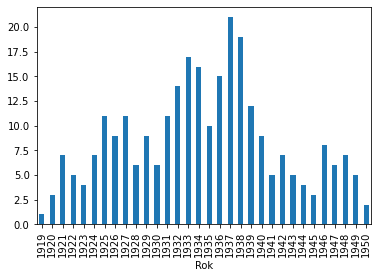

In [24]:
herectvo[herectvo["Jméno"] == "Jan W. Speerger (55928)"].groupby("Rok")["Film"].nunique().plot.bar()

In [25]:
", ".join(herectvo[herectvo["Jméno"] == "Jan W. Speerger (55928)"]["Role"].to_list())

'hráč karet, číšník, nosič, skladník, řidič Karel, horník, vrátný v Portheimce/mistr tiskař, lupič Joe Pelíšek, kočí, dozorce strážmistr Hájek, dozorce v přádelně, strýček na svatbě, divák na představení, posel z velitelství, lodník, muzikant, dražitel, četník ve vlaku, hospodářská kontrola, četník Kraus, mechanik Vondra, vesničan Karel Loukota, německý voják, lupič, rváč, kočí Jan Průcha, horník Stoupa, kasař Jiří Kočka, železničář, nastávající Zacharové, handlíř, muž na veselici, brýlatý hráč karet, dřevař Jura, ředitel hotelu, biřic Malina, četnický strážmistr, tajný v sanatoriu, skalák, porybný, filmový herec, hajný Valenta, divadelní sluha Peterka, host s dětmi, člen představenstva záložny, pískař, kočébr Toník Karpíšek, zahradník Příhoda, policejní inspektor, posluha v hotelu, tajný, recepční úředník hotelu, člen Flokovy bandy, havíř Prokeš, Václav, sluha v penzionu, podkoní, strážník, Karáskův otec, muž na plese, strážník, komorník na zámku Leopold, listonoš, automontér, železni

In [26]:
herectvo[(~herectvo["Datum narození"].isnull()) & herectvo["Datum úmrtí"].isnull()].groupby("Jméno")["Film"].nunique().nlargest(10)

Jméno
Jan Kuželka (1445)            116
Jiří Lábus (838)              114
Jan Přeučil (4990)             99
Karel Hábl (27177)             93
Jiří Krampol (4985)            91
Jan Kraus (1062)               89
Jiřina Bohdalová (2878)        87
Oldřich Vlach (14387)          85
Jitka Zelenohorská (34821)     77
Ondřej Vetchý (836)            77
Name: Film, dtype: int64

In [27]:
herectvo[herectvo["Jméno"] == "Jiřina Bohdalová (2878)"][["Rok","Film","Věk","Role"]].sort_values(by="Rok").head(10)

,Rok,Film,Věk,Role
44153,1937,Pižla a Žižla na cestách (395752),6.0,holčička
44152,1939,Zlatý člověk (395859),8.0,dcerka zraněného dílovedoucího
44150,1940,Madla zpívá Evropě (395922),9.0,"Jiřinka, členka dětského pěveckého sboru"
44149,1940,Dceruška k pohledání (395926),9.0,dítě
44151,1940,Babička (395928),9.0,dítě na dožínkách
44148,1947,Muzikant (396045),16.0,děvče na taneční zábavě
44147,1952,Únos (396149),21.0,tanečnice
44146,1955,Něco se tu změnilo (396202),24.0,zdravotní sestra
44145,1955,Direktiva (396228),24.0,delegátka festivalu
44140,1956,Honzíkova cesta (396263),25.0,sekretářka televize


<AxesSubplot:xlabel='Rok'>

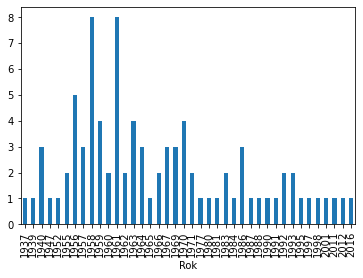

In [28]:
herectvo[herectvo["Jméno"] == "Jiřina Bohdalová (2878)"].groupby("Rok")["Film"].nunique().plot.bar()

## Další rekordy

In [29]:
herectvo[herectvo["Věk"] <= 18].groupby("Jméno")["Film"].nunique().nlargest(10)

Jméno
Vladimír Salač (126323)          21
Vladimír Bejval (15695)          17
Vladimír Zátka (128952)          16
Filip Renč (558)                 15
Jan Kraus (1062)                 15
Michael Hofbauer (13613)         14
Jaroslava Schallerová (75385)    13
Josef Filip (127149)             13
Josef Kemr (4897)                13
Tomáš Holý (27091)               13
Name: Film, dtype: int64

In [30]:
herectvo[herectvo["Věk"] <= 12].groupby("Jméno")["Film"].nunique().nlargest(10)

Jméno
Tomáš Holý (27091)         12
Vladimír Zátka (128952)    12
Jan Kreidl (128115)        10
Josef Filip (127149)       10
Vladimír Bejval (15695)    10
Dagmar Appelová (28474)     9
Hanuš Bor (7070)            9
Lukáš Bech (23548)          9
Michal Koblic (128743)      9
Filip Renč (558)            8
Name: Film, dtype: int64

In [31]:
herectvo[herectvo["Věk"] >= 67].groupby("Jméno")["Film"].nunique().nlargest(10)

Jméno
Josef Střecha (55613)        68
Vlastimila Vlková (27109)    55
Alois Dvorský (127491)       48
Josef Oliak (128024)         41
Antonín Soukup (87404)       37
Marie Rosůlková (4751)       37
Vladimír Hlavatý (34999)     37
Bohdan Lachman (128508)      34
Josef Příhoda (128694)       34
Slávka Hamouzová (84688)     34
Name: Film, dtype: int64

## Kolegové

In [32]:
df["Spoluherectvo"] = df["Film"].map(df.groupby("Film")["Hrají"].agg(list))

In [33]:
def kolegove(jmeno):
    kolegove = df[df["Hrají"] == jmeno]["Spoluherectvo"].to_list()
    kolegove2 = [item for kolegove in kolegove for item in kolegove]
    kolegove = []
    for k in kolegove2:
        if k not in kolegove:
            kolegove.append(k)
    return(kolegove)

In [34]:
len(kolegove("Jiřina Bohdalová (2878)"))

1230

In [35]:
spoluherci = {}
for n in nejaktivnejsich500:
    spoluherci[n] = len(kolegove(n))
spoluherci = pd.Series(spoluherci)

In [36]:
spoluherci.sort_values(ascending=False).head(30)

Jaroslav Tomsa (2576)          2287
Jan Kuželka (1445)             2150
Josef Somr (1054)              2092
Zdeněk Srstka (7960)           2063
Oldřich Velen (12725)          2037
Jiří Lábus (838)               2027
Jan Skopeček (8252)            2019
Jan Přeučil (4990)             1962
Lubomír Kostelka (841)         1950
Karel Engel (14390)            1948
Ondřej Vetchý (836)            1894
František Filipovský (4735)    1851
Jiří Lír (4926)                1844
Josef Kemr (4897)              1838
Vladimír Hlavatý (34999)       1828
Oldřich Vlach (14387)          1828
Marek Vašut (3566)             1808
Karel Hovorka (76534)          1804
Jan Kraus (1062)               1795
Václav Kotva (2718)            1784
Mirko Musil (33555)            1767
Raoul Schránil (5103)          1764
Karel Augusta (5058)           1741
Rudolf Hrušínský st. (4842)    1726
Karel Hábl (27177)             1723
Vladimír Navrátil (12670)      1718
Jan Pohan (7665)               1708
Zdeněk Skalický (126510)    

## Červí díry

In [37]:
prvni = herectvo["Rok"].min()
posledni = [herectvo["Rok"].max(), herectvo["Rok"].max()-1]

In [38]:
prvni_herectvo = herectvo[herectvo["Rok"] == prvni]["Jméno"].drop_duplicates().to_list()
prvni_herectvo

['Josef Šváb-Malostranský (55291)',
 'Ferdinand Gýra (60351)',
 'Marie Kříženecká (99776)']

In [39]:
posledni_herectvo = herectvo[herectvo["Rok"].isin(posledni)]["Jméno"].drop_duplicates().to_list()
posledni_herectvo

['Petr Koutecký (10038)',
 'Zuzana Mauréry (10074)',
 'Robert Hájek (1047)',
 'Iva Janžurová (1049)',
 'Tomáš Vorel (106)',
 'Otmar Brancuzský (1063)',
 'Martin Hanuš (1080)',
 'Radek Kašpar (10839)',
 'Richard Krajčo (10906)',
 'Eliáš Vyskočil (109756)',
 'Matěj Ruppert (10986)',
 'Sabina Rojková (109996)',
 'Tomáš Bambušek (11031)',
 'Petr Klimeš (11127)',
 'Miroslav Šnajdr (11158)',
 'Mirka Zlatníková (111683)',
 'Ivana Uhlířová (11309)',
 'Simona Peková (11310)',
 'Barbora Hrzánová (1146)',
 'Jan Kačer (1165)',
 'František Ringo Čech (11726)',
 'Václav Jiráček (12107)',
 'Jakub Steklý (121972)',
 'Šarlota Frantinová (122105)',
 'Elizaveta Maximová (122160)',
 'Karel Jakubů (124115)',
 'Vendulka Křížová (12412)',
 'Jan Hofman (124188)',
 'Vojtěch Hrabák (124690)',
 'Uršula Kluková (12475)',
 'Zuzana Žáková (124948)',
 'Kill the Dandies! (125293)',
 'Ondřej Brousek (12548)',
 'Tereza Kostková (12623)',
 'Martin Sobotka (126452)',
 'Vladimír Hauser (12684)',
 'Zdeněk Procházka (127279

In [40]:
cervi_diry = []
cervi_filmy = []
for n in vsechno_herectvo:
    spolu = kolegove(n)
    for x in prvni_herectvo:
        if x in spolu:
            for y in posledni_herectvo:
                if y in spolu:
                    print(f"{n}, {x}, {y}")
                    n_filmy = df[df["Hrají"] == n]["Film"].drop_duplicates().to_list()
                    y_filmy = df[df["Hrají"] == y]["Film"].drop_duplicates().to_list()
                    z_filmy = []
                    for nf in n_filmy:
                        if nf in y_filmy:
                            z_filmy.append(nf)
                            cervi_filmy.append(nf)
                    print(z_filmy)
                    print("***")
                    if n not in cervi_diry:
                        cervi_diry.append(n)

Bedřich Vrbský (83528), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['Čintamani & podvodník (396606)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['„Marečku, podejte mi pero!“ (397112)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Jan Kačer (1165)
['Údolí včel (396722)', 'Velká neznámá (396861)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Jan Kuželka (1445)
['Vítězný lid (397143)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Daniela Kolářová (1847)
['Na samotě u lesa (397110)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Vlasta Žehrová (2776)
['„Marečku, podejte mi pero!“ (397112)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Ivana Chýlková (4684)
['Faunovo velmi pozdní odpoledne (397404)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Pavel Nový (510)
['Kuřata na cestách (396497)']
***
František Kovářík (12691

['Bez svatozáře (396552)']
***
Hermína Vojtová (127041), Josef Šváb-Malostranský (55291), Jiří Klem (5481)
['Bez svatozáře (396552)']
***
Jaroslav Marvan (9550), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['Čintamani & podvodník (396606)']
***
Jaroslav Marvan (9550), Josef Šváb-Malostranský (55291), Daniela Kolářová (1847)
['Noc na Karlštejně (396999)']
***
Jaroslav Marvan (9550), Josef Šváb-Malostranský (55291), František Němec (2788)
['Fantom Morrisvillu (396706)']
***
Ela Poznerová (126572), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['Všichni musí být v pyžamu (397486)']
***
Ela Poznerová (126572), Josef Šváb-Malostranský (55291), Eliška Balzerová (14418)
['Všichni musí být v pyžamu (397486)']
***
Ela Poznerová (126572), Josef Šváb-Malostranský (55291), Petr Drozda (1502)
['Všichni musí být v pyžamu (397486)']
***
Ela Poznerová (126572), Josef Šváb-Malostranský (55291), Daniela Kolářová (1847)
['Léto s kovbojem (397114)']
***
Ela Poznerová (126572), Josef Šváb

In [41]:
cervi_diry

['Bedřich Vrbský (83528)',
 'František Kovářík (126912)',
 'Jarmila Kronbauerová (128121)',
 'Eman Fiala (64088)',
 'Antonín Meisner (127732)',
 'L. H. Struna (126711)',
 'Olga Augustová (28479)',
 'Marta Májová (127723)',
 'Václav Vydra ml. (126535)',
 'Marie Grossová (126416)',
 'Vladimír Hlavatý (34999)',
 'Alois Dvorský (127491)',
 'Václav Wasserman (37326)',
 'Jára Kohout (4846)',
 'Zdeněk Štěpánek (87457)',
 'Hermína Vojtová (127041)',
 'Jaroslav Marvan (9550)',
 'Ela Poznerová (126572)',
 'Darja Hajská (35228)',
 'Frank Argus (28475)',
 'Fred Bulín (128225)',
 'Marie Nademlejnská (127317)',
 'Josef Steigl (128760)',
 'Ela Šárková (126039)',
 'Světla Svozilová (126470)',
 'Nataša Gollová (36491)']

In [42]:
cervi_diry_ciste = []
for c in cervi_diry:
    c = c.split(" (")[0]
    cervi_diry_ciste.append(c)
print(", ".join(cervi_diry_ciste))

Bedřich Vrbský, František Kovářík, Jarmila Kronbauerová, Eman Fiala, Antonín Meisner, L. H. Struna, Olga Augustová, Marta Májová, Václav Vydra ml., Marie Grossová, Vladimír Hlavatý, Alois Dvorský, Václav Wasserman, Jára Kohout, Zdeněk Štěpánek, Hermína Vojtová, Jaroslav Marvan, Ela Poznerová, Darja Hajská, Frank Argus, Fred Bulín, Marie Nademlejnská, Josef Steigl, Ela Šárková, Světla Svozilová, Nataša Gollová


In [43]:
len(cervi_diry)

26

In [44]:
cervi_filmy

['Čintamani & podvodník (396606)',
 '„Marečku, podejte mi pero!“ (397112)',
 'Údolí včel (396722)',
 'Velká neznámá (396861)',
 'Vítězný lid (397143)',
 'Na samotě u lesa (397110)',
 '„Marečku, podejte mi pero!“ (397112)',
 'Faunovo velmi pozdní odpoledne (397404)',
 'Kuřata na cestách (396497)',
 'Údolí včel (396722)',
 '„Marečku, podejte mi pero!“ (397112)',
 'Čintamani & podvodník (396606)',
 'Hledá se táta! (396457)',
 'Handlíři (396548)',
 'Volejte Martina (396639)',
 'U telefonu Martin (396686)',
 'U telefonu Martin (396686)',
 'Akce v Istanbulu (397084)',
 'Handlíři (396548)',
 'Zbraně pro Prahu (397041)',
 'Zbraně pro Prahu (397041)',
 'Tátova škola (396561)',
 'Fantom Morrisvillu (396706)',
 'Handlíři (396548)',
 'Zabil jsem Einsteina, pánové... (396812)',
 'Fantom Morrisvillu (396706)',
 'Znamení Raka (396675)',
 'Nejlepší ženská mého života (396785)',
 'Zabil jsem Einsteina, pánové... (396812)',
 'Bouřlivé víno (397122)',
 'Což takhle dát si špenát (397165)',
 'Zralé víno (3

In [45]:
herectvo[herectvo["Jméno"].isin(cervi_diry)].groupby("Jméno")["Rok úmrtí"].max().sort_values()

Jméno
Josef Steigl (128760)            1965.0
Alois Dvorský (127491)           1966.0
Bedřich Vrbský (83528)           1966.0
Václav Wasserman (37326)         1967.0
Jarmila Kronbauerová (128121)    1968.0
Frank Argus (28475)              1968.0
Zdeněk Štěpánek (87457)          1968.0
Světla Svozilová (126470)        1970.0
Olga Augustová (28479)           1970.0
Marta Májová (127723)            1970.0
Eman Fiala (64088)               1970.0
Marie Grossová (126416)          1972.0
Fred Bulín (128225)              1972.0
Marie Nademlejnská (127317)      1974.0
Jaroslav Marvan (9550)           1974.0
Antonín Meisner (127732)         1975.0
Hermína Vojtová (127041)         1976.0
Václav Vydra ml. (126535)        1979.0
L. H. Struna (126711)            1980.0
Darja Hajská (35228)             1981.0
František Kovářík (126912)       1984.0
Nataša Gollová (36491)           1988.0
Ela Poznerová (126572)           1991.0
Ela Šárková (126039)             1991.0
Vladimír Hlavatý (34999)         1

## Nejvíc oskarových filmů

In [46]:
oskari = ['Obchod na korze (396649)', 'Ostře sledované vlaky (396694)', 'Kolja (9013)']

In [47]:
df[df["Film"].isin(oskari)].groupby("Hrají")["Film"].nunique().nlargest()

Hrají
Adam Matejka (126967)        1
Alois Vachek (130102)        1
Andrej Chalimon (37311)      1
Andrej Šilan (59766)         1
Bohumil Cajthaml (130273)    1
Name: Film, dtype: int64

In [48]:
oskarianominace = ['Obchod na korze (396649)','Lásky jedné plavovlásky (396651)','Ostře sledované vlaky (396694)','Hoří, má panenko (396750)','Kolja (9013)','Vesničko má středisková (397480)','Obecná škola (397700)','Želary (13452)','Želary (13452)']

In [49]:
df[df["Film"].isin(oskarianominace)].groupby("Hrají")["Film"].nunique().nlargest()

Hrají
Milada Ježková (79014)      4
Libuše Šafránková (2272)    3
Zdeněk Svěrák (1892)        3
Jan Tříska (4834)           2
Jan Vostrčil (11100)        2
Name: Film, dtype: int64

In [50]:
df[(df["Film"].isin(oskarianominace) & (df["Hrají"] == "Milada Ježková (79014)"))]

,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Originální název,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Ocenění,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Natáčecí formát,Dialogy české verze,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,povídkový film,Povídky,Hudba k písni,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Zpěv role,Překlad české verze,Rychlost,Přístupnost,Začátek výroby,Konec výroby,Hlavní role,Vedlejší role,Spoluherectvo
1974,Lásky jedné plavovlásky (396651),Československo,1965,1965,festivalová premiéra srpen 1965 (26. mezináro...,77.0,Miloš Forman (7872),film,"[komedie, hořká komedie]","[hraný, distribuční]",Lásky jedné plavovlásky,Lásky jedné plavovlásky,Loves of a Blonde,None,Přihořívá / Láska jako prám,Milada Ježková (79014),"[Andula, klavírista Míla Vašata, záložák Vacov...",Ivan Passer (7890),None,"[Jaroslav Papoušek (4930), Ivan Passer (7890),...","[Jaroslav Papoušek (4930), Ivan Passer (7890),...",Václav Šašek (1766),Miroslav Ondříček (3524),Rudolf Blaháček (14330),Karel Černý (1241),None,Rudolf Hammer (5119),Miroslav Hájek (54607),zvukový,None,Rudolf Hájek (12756),Jaroslav Solnička (85467),None,[Evžen Illín (27434)],None,[],Filmová komedie se sestrou Jany Brejchové v hl...,Filmové studio Barrandov,None,Státní fond kinematografie,"[Ústřední půjčovna filmů (původní 1965), Národ...",dlouhometrážní,"[16mm, 35mm, DCP 2-D, BRD]",1.37,černobílý,mono,česká,česky,bez titulků,české,Druhý celovečerní film Miloše Formana (natočen...,"Dívka s kytarou zpívá šlágr To, co bylo včera,...",Miloš Forman (7872),None,None,None,None,None,None,[Johann Sebastian Bach (6661)],None,2195.0,None,[Vítěz Akce: Anketa filmových kritiků o nejlep...,Národní filmový archiv archivuje také 9. díl N...,None,None,None,None,None,None,None,None,None,None,None,"[Orchestr Karla Vlacha (2852), Karel Vlach (22...",None,None,Vladimír Mácha (127847),"[Pavla Marková (36607), Jaromír Komárek (22275)]",None,None,Ladislav Chroust (59307),None,None,None,None,"[Muži z Ria, Smích /Chi Chi/, Hej, panímámo, T...",schválení literárního scénáře 13. 5. 1964 ...,None,None,None,None,None,None,bez ateliérů,None,None,None,None,None,None,None,None,None,None,None,Miloš Červinka (31108),None,None,Jaroslav Vlk (130440),Lilian Havlíčková (66986),"Zdena Šnajdarová (31117), Emilie Fišarová (20249)",Jitka Šulcová (129636),None,None,None,"Národní filmový archiv, Obchodní oddělení",None,None,"Tvůrčí skupina Šebor – Bor, Vladimír Bor (vedo...",None,None,None,None,None,None,None,1965,1965,"[Hana Brejchová (81393), Vladimír Pucholt (222...","[Jiří Hrubý (59333), Milada Ježková (79014), J...","[Hana Brejchová (81393), Vladimír Pucholt (222..."
2060,Ostře sledované vlaky (396694),Československo,1966,1966,předpremiéra 26. 

## Hlavní a vedlejší role

In [51]:
hvezdnost = pd.Series(df.explode("Hlavní role").groupby("Hlavní role")["Film"].nunique() / df.explode("Hrají").groupby("Hrají")["Film"].nunique(), name="Hvězdnost")

In [52]:
hvezdy = pd.DataFrame([hvezdnost, obsazovanost]).transpose()

In [53]:
hvezdy

,Hvězdnost,Obsazovanost
(person),NaN,NaN
Ajala (77698),NaN,NaN
Baky (13703),NaN,NaN
Bohemia Big Band (18563),NaN,NaN
Boni Pueri (22837),NaN,NaN
...,...,...
Útvar rychlého nasazení (102657),NaN,1.0
Čestmír Řanda st. (36487),NaN,60.0
Šarlota Frantinová (122105),NaN,1.0
Šimon Štěpán (18605),NaN,1.0


In [54]:
hvezdy[hvezdy["Obsazovanost"] >= q].sort_values(by="Hvězdnost", ascending=False).head(50)

,Hvězdnost,Obsazovanost
Vlasta Burian (11992),0.974359,40.0
Suzanne Marwille (127373),0.900000,37.0
Anny Ondráková (127280),0.810811,35.0
Hugo Haas (37289),0.766667,30.0
Karel Lamač (37847),0.698413,60.0
Karel Höger (38146),0.691176,68.0
Anna Geislerová (5433),0.685714,41.0
Tatiana Pauhofová (7594),0.666667,22.0
Jana Brejchová (7710),0.666667,60.0
Oldřich Nový (12009),0.658537,42.0


In [55]:
nejvetsi_hvezdy_c_filmu = hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy["Hvězdnost"] > 0.5)].sort_values(by="Hvězdnost", ascending=False).head(50).index.to_list()
super_hvezdy = []
for n in nejvetsi_hvezdy_c_filmu:
    n = n.split(" (")[0]
    super_hvezdy.append(n)
print(len(super_hvezdy))
print(", ".join(super_hvezdy))

32
Vlasta Burian, Suzanne Marwille, Anny Ondráková, Hugo Haas, Karel Lamač, Karel Höger, Anna Geislerová, Tatiana Pauhofová, Jana Brejchová, Oldřich Nový, Lída Baarová, Zdeněk Štěpánek, Hana Vítová, Karel Hašler, Tatiana Vilhelmová, Jiří Mádl, Otomar Korbelář, Jiří Vala, Marta Vančurová, Ivan Trojan, Jaromír Hanzlík, Eduard Cupák, Boleslav Polívka, Kryštof Hádek, Václav Voska, Jiří Adamíra, Adina Mandlová, Iva Janžurová, Jiřina Štěpničková, Josef Abrhám, Vladimír Dlouhý, Oldřich Kaiser


In [56]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy.index.isin(zijici))].sort_values(by="Hvězdnost", ascending=False).head(35)

,Hvězdnost,Obsazovanost
Anna Geislerová (5433),0.685714,41.0
Jana Brejchová (7710),0.666667,60.0
Tatiana Pauhofová (7594),0.666667,22.0
Tatiana Vilhelmová (935),0.600000,34.0
Jiří Mádl (18965),0.592593,27.0
Marta Vančurová (5491),0.571429,24.0
Ivan Trojan (6789),0.571429,26.0
Jaromír Hanzlík (14425),0.565217,49.0
Boleslav Polívka (1556),0.564516,62.0
Kryštof Hádek (1830),0.548387,34.0


In [57]:
df = df[["Hrají","Hlavní role","Vedlejší role","Film","Žánr","Copyright"]].explode("Hlavní role").explode("Vedlejší role")

In [58]:
df[df["Vedlejší role"] == "Vlasta Burian (11992)"]["Film"].drop_duplicates().to_list()

['Zaostřit prosím! (396247)']

In [59]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy["Hvězdnost"].isnull())].sort_values(by="Obsazovanost", ascending=False).head(10)

,Hvězdnost,Obsazovanost
Karel Hovorka (76534),NaN,136.0
Vladimír Navrátil (12670),NaN,125.0
Jan Kuželka (1445),NaN,116.0
Zdeněk Srstka (7960),NaN,108.0
Karel Bělohradský (6370),NaN,99.0
Jindřich Narenta (87097),NaN,96.0
Jan Cmíral (125562),NaN,96.0
Zdeněk Skalický (126510),NaN,93.0
Antonín Jirsa (129711),NaN,86.0
Vítězslav Černý (126687),NaN,85.0


In [60]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy["Hvězdnost"].isnull())].sort_values(by="Obsazovanost", ascending=False).shape

(185, 2)

In [61]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (~hvezdy["Hvězdnost"].isnull())].sort_values(by="Hvězdnost", ascending=True).head(10)

,Hvězdnost,Obsazovanost
Jaroslav Tomsa (2576),0.006579,151.0
Jiřina Bílá (3629),0.008696,115.0
Karel Engel (14390),0.009174,94.0
Josef Oliak (128024),0.010417,94.0
Emanuel Hříbal (127758),0.010753,93.0
Josef Steigl (128760),0.012346,79.0
Karel Pavlík (126439),0.012658,81.0
Viktor Maurer (78076),0.013889,75.0
F. X. Mlejnek (128287),0.015385,104.0
Karel Augusta (5058),0.015625,128.0


In [62]:
df[df["Hlavní role"] == "Jaroslav Tomsa (2576)"]["Film"].drop_duplicates().to_list()

['Koncert (397284)']

## Typologie herců

In [63]:
df = df.explode("Žánr")

In [64]:
df = df.replace("černá komedie","komedie").replace("bláznivá komedie","komedie").replace("hořká komedie","komedie").replace("smutná komedie","komedie")

In [65]:
df = df.merge(obsazovanost, left_on="Hrají", right_on="Jméno")

In [66]:
zanry = df["Žánr"].drop_duplicates().to_list()

In [67]:
df.columns

Index(['Hrají', 'Hlavní role', 'Vedlejší role', 'Film', 'Žánr', 'Copyright',
       'Obsazovanost'],
      dtype='object')

In [68]:
for z in zanry:
    print(f"""{z}: {df[df["Žánr"] == z].groupby("Hrají")["Film"].nunique().nlargest(1)}""")

fraška: Hrají
Theodor Pištěk (37366)    9
Name: Film, dtype: int64
anekdota: Hrají
Antonín Kachlík (7880)    1
Name: Film, dtype: int64
komedie: Hrají
Jan W. Speerger (55928)    117
Name: Film, dtype: int64
melodrama: Hrají
Theodor Pištěk (37366)    47
Name: Film, dtype: int64
historický: Hrají
Oldřich Velen (12725)    20
Name: Film, dtype: int64
dobrodružný: Hrají
Radovan Lukavský (3301)    8
Name: Film, dtype: int64
drama: Hrají
Jan W. Speerger (55928)    88
Name: Film, dtype: int64
fantastický: Hrají
Antonín Soukup (87404)    4
Name: Film, dtype: int64
kriminální: Hrají
Jiřina Bílá (3629)    16
Name: Film, dtype: int64
pohádka: Hrají
Jan Skopeček (8252)    10
Name: Film, dtype: int64
osvětový: Hrají
František Šlégr (127637)    4
Name: Film, dtype: int64
tragikomedie: Hrají
Jiří Menzel (7887)    8
Name: Film, dtype: int64
propagační: Hrají
Antonín Jedlička (4739)    3
Name: Film, dtype: int64
špionážní: Hrají
Jan Pohan (7665)    5
Name: Film, dtype: int64
hudební: Hrají
Karel Hovorka

In [69]:
for z in zanry:
    typicke_herectvo = pd.Series(df[(df["Žánr"] == z) & (df["Obsazovanost"] >= q)].groupby("Hrají")["Film"].nunique() / df.groupby("Hrají")["Obsazovanost"].max()).nlargest(10)
    print(z)
    print(typicke_herectvo)
    print("***")

fraška
Hrají
Josef Waltner (126405)             0.138889
Ada Karlovský (85828)              0.128205
Jindřich Adolf (13279)             0.111111
Josef Sládek (18352)               0.111111
Alfred Baštýř (28814)              0.108108
František Beranský (49046)         0.090909
Mario Karas (101579)               0.088235
Josef Rovenský (37766)             0.084507
Josef Šváb-Malostranský (55291)    0.082192
Karel Němec (128590)               0.081967
dtype: float64
***
anekdota
Hrají
Edita Dindělová (27933)      0.045455
Jan Víšek (4757)             0.037037
Vladimír Klemens (128722)    0.034483
Pavla Maršálková (126529)    0.029412
Ilona Jirotková (126679)     0.027027
Tomáš Hanák (198)            0.025000
Jiřina Šejbalová (125559)    0.023256
František Kubíček (87096)    0.020833
Pavel Landovský (1136)       0.020000
Marta Richterová (27358)     0.019608
dtype: float64
***
komedie
Hrají
Vlasta Burian (11992)        0.850000
Hugo Haas (37289)            0.800000
Jára Kohout (4846)      

detektivní
Hrají
Jarmila Orlová (31061)                   0.181818
Božena Böhmová (27878)                   0.166667
Miloš Willig (82925)                     0.145455
Zdeněk Týle (129029)                     0.136364
Bohumil Šmída (31114)                    0.127660
Hana Pastejříková (6130)                 0.125000
Václav Wasserman (37326)                 0.121212
Vladimír Ptáček (126428)                 0.116279
Anna Gabrielová (4949)                   0.115385
Gabriela Bártlová-Buddeusová (127814)    0.109091
dtype: float64
***
trikový
Hrají
Gabriela Osvaldová (4281)    0.045455
Miroslav Krobot (21995)      0.043478
Václav Neužil (9101)         0.040000
Jaromír Nosek (585)          0.038462
Nela Boudová (8226)          0.037037
Pavel Liška (984)            0.035714
Arnošt Goldflam (1579)       0.031250
Jarka Pižla (128001)         0.031250
Jan Vondráček (1713)         0.028571
Miloslav Holub (5166)        0.027778
dtype: float64
***
sociální
Hrají
Frank Rose-Růžička (127740)    0.083

rodinný
Hrají
Václav Neužil (9101)        0.120000
Hynek Čermák (3370)         0.115385
Matěj Hádek (11532)         0.107143
Marek Taclík (9420)         0.096774
Vlasta Žehrová (2776)       0.090909
Martin Faltýn (6096)        0.086957
Otmar Brancuzský (1063)     0.086957
Vanda Hybnerová (937)       0.086957
Naďa Konvalinková (4988)    0.083333
Jana Štěpánková (14419)     0.078947
dtype: float64
***
muzikál
Hrají
Milan Kindl (126442)         0.119048
Oskar Hák (7589)             0.114286
Bert Schneider (126653)      0.103448
Marie Popelková (35279)      0.068966
Jiří Bruder (125486)         0.063830
Miloslav Svoboda (127909)    0.062500
Pavel Spálený (126440)       0.062500
Eugen Jegorov (80974)        0.061538
Vladimír Linka (83322)       0.054545
Jan Maška (126431)           0.054054
dtype: float64
***
budovatelský
Hrají
Hynek Němec (128790)          0.173913
Bohumil Machník (88247)       0.130435
František Klika (128312)      0.115385
Karel Vavřík (128721)         0.107143
Otto Čerm

populárně-vědecký
Hrají
Jan Řeřicha (76482)        0.045455
Jiří Adamíra (4730)        0.027778
Jiří Havel (19846)         0.022222
Vladimír Štros (128652)    0.020833
Josef Šebek (1436)         0.018519
Josef Větrovec (27335)     0.017241
Jiří Holý (13204)          0.014925
F. X. Mlejnek (128287)     0.009615
Jiří Lábus (838)           0.008772
A. M. Brousil (127207)          NaN
dtype: float64
***
erotický
Hrají
Jiří Pomeje (3876)           0.125000
Michaela Kuklová (3313)      0.086957
Oldřich Vízner (8257)        0.060606
Mahulena Bočanová (19607)    0.045455
Pavel Pípal (6302)           0.043478
Václav Knop (12652)          0.041667
Blanka Lormanová (14388)     0.040000
Dana Syslová (52427)         0.038462
Nela Boudová (8226)          0.037037
Hanuš Bor (7070)             0.035714
dtype: float64
***
milostný
Hrají
Kryštof Hádek (1830)       0.117647
Martin Stránský (7770)     0.090909
Miroslav Krobot (21995)    0.086957
Ondřej Malý (59148)        0.081081
Jiří Mádl (18965)       

výukový
Hrají
Miroslav Krobot (21995)          0.043478
Pavel Liška (984)                0.035714
A. M. Brousil (127207)                NaN
A. Pahl (21791)                       NaN
A. Pokorný (21836)                    NaN
A. Ryzák (19930)                      NaN
A. V. Frič (104959)                   NaN
A. V. Jarol-Jarolímek (51927)         NaN
A. Černá (44606)                      NaN
Aaron Monaghan (59068)                NaN
dtype: float64
***
medailon
Hrají
A. M. Brousil (127207)          NaN
A. Pahl (21791)                 NaN
A. Pokorný (21836)              NaN
A. Ryzák (19930)                NaN
A. V. Frič (104959)             NaN
A. V. Jarol-Jarolímek (51927)   NaN
A. Černá (44606)                NaN
Aaron Monaghan (59068)          NaN
Aaron Thomas (33669)            NaN
Abdelhafidh Bouassida (54108)   NaN
dtype: float64
***
videoklip
Hrají
A. M. Brousil (127207)          NaN
A. Pahl (21791)                 NaN
A. Pokorný (21836)              NaN
A. Ryzák (19930)             

In [70]:
df.groupby("Hrají")["Žánr"].nunique().nlargest()

Hrají
František Filipovský (4735)    38
Jaroslav Tomsa (2576)          38
Josef Kemr (4897)              38
Josef Hlinomaz (26212)         37
Eman Fiala (64088)             34
Name: Žánr, dtype: int64

In [71]:
df.groupby("Hlavní role")["Žánr"].nunique().nlargest()

Hlavní role
Karel Roden (494)              23
Miloš Kopecký (4959)           22
Vlastimil Brodský (833)        22
Jana Brejchová (7710)          21
Rudolf Hrušínský st. (4842)    21
Name: Žánr, dtype: int64